#Import libraries

In [1]:
import os
import sys
from getpass import getpass
import json
import git
import dropbox
import torch.optim as optim

#Configure environment

In [2]:
os.environ["ENVIRONMENT"] = "windows"
os.environ["REPO_DIR"] = git.Repo(search_parent_directories=True).git.rev_parse("--show-toplevel")
os.environ["ROOT_DIR"] = os.path.abspath(os.path.join(os.getenv("REPO_DIR"), os.pardir))
os.environ["MODEL_ID"] = "2xzouvkk"
os.environ["MODEL_DIR"] = f"{os.getenv('REPO_DIR')}/models/model_{os.getenv('MODEL_ID')}"

#Import repository resources

In [3]:
sys.path.append(f"{os.getenv('REPO_DIR')}/src")
from helpers import *

sys.path.append(f"{os.getenv('MODEL_DIR')}/src")
from methods import *
from architecture import *

#Download datasets

In [4]:
# dbx_access_token = getpass("Enter your DropBox access token: ")

In [5]:
# download_datasets_from_dropbox(
#     dbx_access_token = dbx_access_token,
#     include_all_datasets = True,
#     use_thread = True
# )

#Work

In [6]:
num_epochs = 75
batch_size = 25
val_size = 10

In [7]:
device = set_device()
model = initialize_model(device=device)
train_dataset, val_dataset, benchmark_dataset = create_datasets(
    device=device, include_real_world_datasets=True)
train_dataloader, val_dataloader, benchmark_dataloader = create_dataloaders(
    train_dataset=train_dataset, val_dataset=val_dataset,
    benchmark_dataset=benchmark_dataset, batch_size=batch_size)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Could not find GPU! :'( Using CPU only.


In [8]:
model, loss_hist, best_val_performance = training_loop(
    model=model, criterion=criterion, optimizer=optimizer, train_dataloader=train_dataloader,
    val_dataloader=val_dataloader, device=device, num_epochs=num_epochs, auto_stop=True)

c:\Users\Awrod\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch: 1/75   <>   Train Loss: 0.8906   <>   Val Acc: 96.00%
Epoch: 5/75   <>   Train Loss: 0.1140   <>   Val Acc: 95.42%
Epoch: 10/75   <>   Train Loss: 0.0888   <>   Val Acc: 95.26%
Epoch: 15/75   <>   Train Loss: 0.0719   <>   Val Acc: 92.23%
Epoch: 20/75   <>   Train Loss: 0.0639   <>   Val Acc: 95.84%
Epoch: 25/75   <>   Train Loss: 0.0512   <>   Val Acc: 95.86%
Epoch: 30/75   <>   Train Loss: 0.0453   <>   Val Acc: 95.76%
Epoch: 35/75   <>   Train Loss: 0.0453   <>   Val Acc: 96.00%
Epoch: 40/75   <>   Train Loss: 0.0444   <>   Val Acc: 96.00%
Epoch: 45/75   <>   Train Loss: 0.0409   <>   Val Acc: 96.00%
Epoch: 50/75   <>   Train Loss: 0.0409   <>   Val Acc: 96.00%
Epoch: 55/75   <>   Train Loss: 0.0349   <>   Val Acc: 96.00%
Epoch: 60/75   <>   Train Loss: 0.0346   <>   Val Acc: 96.00%
Epoch: 65/75   <>   Train Loss: 0.0309   <>   Val Acc: 95.82%
Epoch: 70/75   <>   Train Loss: 0.0318   <>   Val Acc: 95.17%
Epoch: 75/75   <>   Train Loss: 0.0281   <>   Val Acc: 95.29%


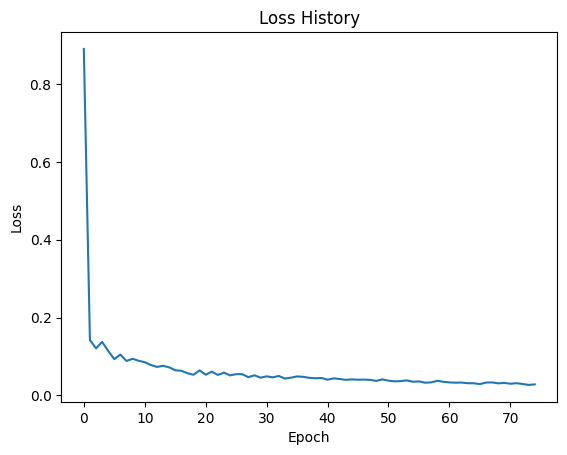

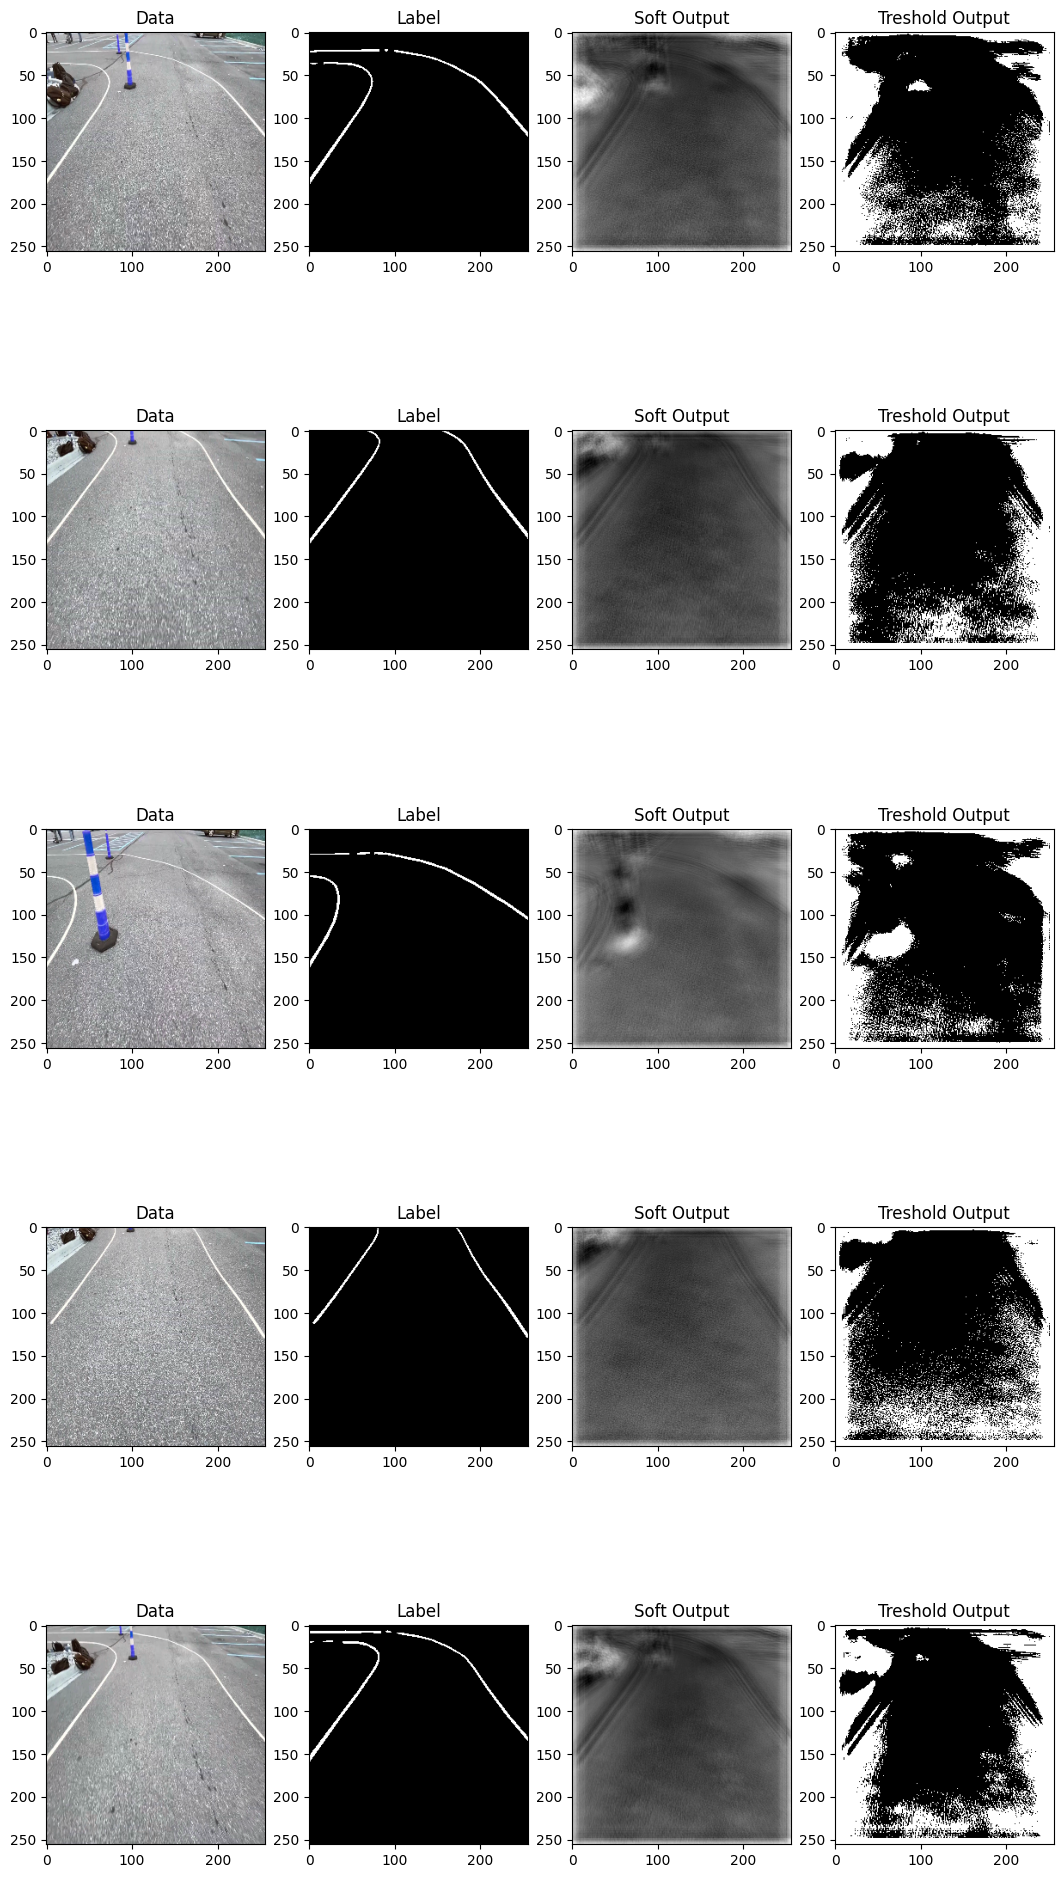

In [9]:
visualize_loss(loss_hist)
visualize_results(model, dataset=train_dataset, device=device, output_threshold=.4)